# Import stuff

In [0]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)
import grading_utils
import keras_utils
from keras_utils import reset_tf_session


Using TensorFlow backend.


1.13.0-rc0
2.0.6


# Load dataset

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170377216/170498071 [============================>.] - ETA: 0s

In [0]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [0]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


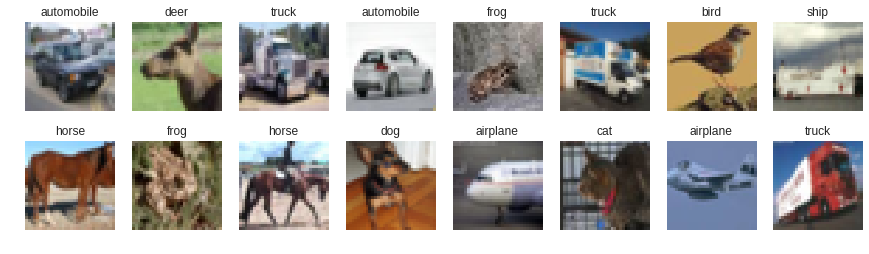

In [0]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [0]:
# normalize inputs by dividing by 255 and subtracting mean 
x_train2 = x_train/255 - 0.5
x_test2 = x_test/255 - 0.5


y_train2 = keras.utils.to_categorical(y_train, 10)
y_test2 = keras.utils.to_categorical(y_test, 10)

In [0]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [0]:
#make cnn model with 4 convolutional layers and adding 'same' padding and LeakyReLU activations. Adding 2 MaxPooling2D layers and 3 Dropout layers

def make_model():
    
    
    model = Sequential()
    model.add(Conv2D(16, kernel_size=(3,3), input_shape=(32,32,3), padding = 'same'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(32, kernel_size=(3,3), padding = "same"))
    model.add(LeakyReLU(0.1))         
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25)) 
    model.add(Conv2D(32, kernel_size=3, padding = "same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(64, kernel_size=3, padding = "same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(units=256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5)) 
    model.add(Dense(units=10)) 
    model.add(Activation("softmax"))                 
    
    return model

In [0]:
# Investigating parameters in different layers of CNN 
s = reset_tf_session()  # clear default graph
model = make_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
______________

In [0]:
INIT_LR = 5e-3  
BATCH_SIZE = 32
EPOCHS = 10

s = reset_tf_session()  # clear default graph

model = make_model()  

model.compile(
    loss='categorical_crossentropy',  
    optimizer=keras.optimizers.adamax(lr=INIT_LR),  
    metrics=['accuracy']  
)

# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

# callback for printing of actual learning rate used by optimizer
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

In [0]:
# fit model
model.fit(
    x_train2, y_train2,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), 
               LrHistory(), 
               keras_utils.TqdmProgressCallback(),
               keras_utils.ModelSaveCallback(model_filename)],
    validation_data=(x_test2, y_test2),
    shuffle=True,
    verbose=0,
    initial_epoch=last_finished_epoch or 0
)

Instructions for updating:
Use tf.cast instead.
Learning rate: 0.005

Epoch 1/10
**************************************************
loss: 1.3378; acc: 0.5228; val_loss: 1.0193; val_acc: 0.6474
Model saved in cifar.000.hdf5
Learning rate: 0.0045

Epoch 2/10
**************************************************
loss: 0.9482; acc: 0.6681; val_loss: 0.8379; val_acc: 0.7063
Model saved in cifar.001.hdf5
Learning rate: 0.00405

Epoch 3/10
**************************************************
loss: 0.8115; acc: 0.7150; val_loss: 0.7487; val_acc: 0.7439
Model saved in cifar.002.hdf5
Learning rate: 0.003645

Epoch 4/10
**************************************************
loss: 0.7250; acc: 0.7445; val_loss: 0.7150; val_acc: 0.7592
Model saved in cifar.003.hdf5
Learning rate: 0.0032805

Epoch 5/10
**************************************************
loss: 0.6671; acc: 0.7664; val_loss: 0.6813; val_acc: 0.7613
Model saved in cifar.004.hdf5
Learning rate: 0.00295245

Epoch 6/10
*****************************

In [0]:
# save weights to file
model.save_weights("weights.h5")

In [0]:
# load weights from file (can call without model.fit)
model.load_weights("weights.h5")

# Evaluate model

In [0]:
# make test predictions
y_pred_test = model.predict_proba(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

 9760/10000 [============================>.] - ETA: 0s

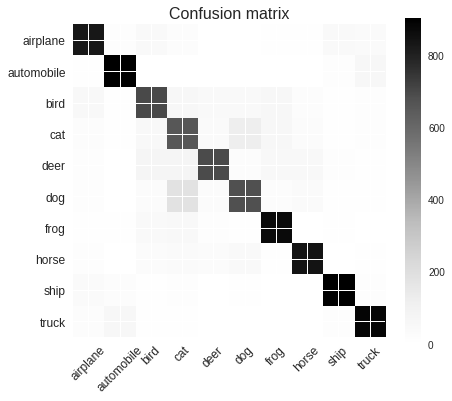

Test accuracy: 0.7973


In [0]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


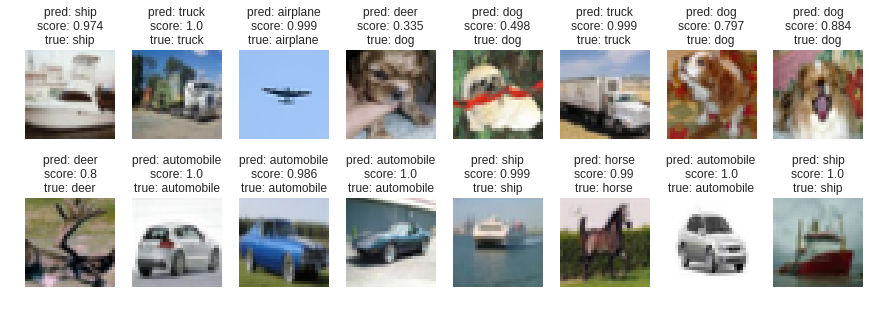

In [0]:
# inspect predictions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()